# Ingestion

We are using the UCI dataset called the "adult data set." The outcome/target is an indicator if the person makes more than $50k (the definition of adult?).

In [1]:
import yellowbrick
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
orig_data = pd.read_csv(url,delimiter=',', header=None)
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation','relationship','race', 'sex', 'capitalgain', 'capitalloss','hoursperweek','nativecountry','outcome']
orig_data.columns = columns

# Wrangling

### First, we strip leading spaces and change dashes to underscores. Also, to make it more "one hot"-able, I am making the values lower cased.

In [2]:
instances = orig_data.apply(lambda x: x.astype(str).str.lower())
instances = instances.apply(lambda x: x.astype(str).str.replace('\-', '_'))
instances = instances.apply(lambda x: x.astype(str).str.strip())

instances.describe(include = 'all')

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,outcome
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,73,9,21648,16,16,7,15,6,5,2,119,92,94,42,2
top,36,private,203488,hs_grad,9,married_civ_spouse,prof_specialty,husband,white,male,0,0,40,united_states,<=50k
freq,898,22696,13,10501,10501,14976,4140,13193,27816,21790,29849,31042,15217,29170,24720


### Clean up the education field.

In [3]:
instances.loc[instances['education'] =='hs_grad', 'education'] = 'highschool'
instances.loc[instances['education'] =='some_college', 'education'] = 'some_college'
instances.loc[instances['education'] =='bachelors', 'education'] = '4yr_degree_or_more'
instances.loc[instances['education'] =='masters', 'education'] = '4yr_degree_or_more'
instances.loc[instances['education'] =='assoc_voc', 'education'] = 'twoyear_degree'
instances.loc[instances['education'] =='11th', 'education'] = 'lt_highschool'
instances.loc[instances['education'] =='assoc_acdm', 'education'] = 'twoyear_degree'
instances.loc[instances['education'] =='10th', 'education'] = 'lt_highschool'
instances.loc[instances['education'] =='7th_8th', 'education'] = 'lt_highschool'
instances.loc[instances['education'] =='prof_school', 'education'] = '4yr_degree_or_more'
instances.loc[instances['education'] =='9th', 'education'] = 'lt_highschool'
instances.loc[instances['education'] =='12th', 'education'] = 'lt_highschool'
instances.loc[instances['education'] =='doctorate', 'education'] = '4yr_degree_or_more'
instances.loc[instances['education'] =='5th_6th', 'education'] = 'lt_highschool'
instances.loc[instances['education'] =='1st_4th', 'education'] = 'lt_highschool'
instances.loc[instances['education'] =='preschool', 'education'] = 'lt_highschool'
instances.loc[instances['education'] =='\?', 'education'] = 'unknown'



### One hot some of the key category fields

In [4]:
import pandas as pd
instances.loc[instances['workclass'] =='\?', 'workclass'] = 'unknown'
instances = pd.concat([instances,pd.get_dummies(instances['workclass'], prefix='workclass')],axis=1)
instances.drop(['workclass'],axis=1, inplace=True)

instances.loc[instances['maritalstatus'] =='\?', 'maritalstatus'] = 'unknown'
instances = pd.concat([instances,pd.get_dummies(instances['maritalstatus'], prefix='maritalstatus')],axis=1)
instances.drop(['maritalstatus'],axis=1, inplace=True)

instances.loc[instances['relationship'] =='\?', 'relationship'] = 'unknown'
instances = pd.concat([instances,pd.get_dummies(instances['relationship'], prefix='relationship')],axis=1)
instances.drop(['relationship'],axis=1, inplace=True)

instances.loc[instances['race'] =='\?', 'race'] = 'unknown'
instances = pd.concat([instances,pd.get_dummies(instances['race'], prefix='race')],axis=1)
instances.drop(['race'],axis=1, inplace=True)

instances.loc[instances['sex'] =='\?', 'sex'] = 'unknown'
instances = pd.concat([instances,pd.get_dummies(instances['sex'], prefix='sex')],axis=1)
instances.drop(['sex'],axis=1, inplace=True)

instances.loc[instances['education'] =='\?', 'education'] = 'unknown'
instances = pd.concat([instances,pd.get_dummies(instances['education'], prefix='edu')],axis=1)
instances.drop(['education'],axis=1, inplace=True)

In [5]:
instances.describe(include = 'all')

,age,fnlwgt,educationnum,occupation,capitalgain,capitalloss,hoursperweek,nativecountry,outcome,workclass_?,...,race_black,race_other,race_white,sex_female,sex_male,edu_4yr_degree_or_more,edu_highschool,edu_lt_highschool,edu_some_college,edu_twoyear_degree
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
unique,73,21648,16,15,119,92,94,42,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,36,203488,9,prof_specialty,0,0,40,united_states,<=50k,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,898,13,10501,4140,29849,31042,15217,29170,24720,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056386,...,0.095943,0.008323,0.854274,0.330795,0.669205,0.247750,0.322502,0.130616,0.223918,0.075213
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230670,...,0.294518,0.090851,0.352837,0.470506,0.470506,0.431713,0.467441,0.336986,0.416874,0.263738
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000


### More wrangling

Capital gains seemed interesting at the time. We create fields for any capital gains or any capital loss.

In [6]:
instances['anycapitalchange'] = 0
instances.loc[instances['capitalgain'] != '0', 'anycapitalchange'] = 1
instances.loc[instances['capitalloss'] != '0', 'anycapitalchange'] = 1

### More wrangling

Create fields for: 

- Is person a native?

- Do they work more than 40 hours a week?

- Make their age an integer

- Make our Target Variable (50k or more)

In [7]:
#us_native
#gte_40hrs_week

instances['us_native'] = 0
instances.loc[instances['nativecountry'] == 'united_states', 'us_native'] = 1

instances['gte_40hrs_week'] = 0
instances.loc[instances['hoursperweek'].astype(int) > 40, 'gte_40hrs_week'] = 1

instances['age'] = instances['age'].astype(int) 

instances['income_gt_50k'] = 0
instances.loc[instances['outcome'] == '>50k', 'income_gt_50k'] = 1


### Feature Selection

We will take the original list of fields and start paring down the list.

In [8]:
instances.columns

Index(['age', 'fnlwgt', 'educationnum', 'occupation', 'capitalgain',
       'capitalloss', 'hoursperweek', 'nativecountry', 'outcome',
       'workclass_?', 'workclass_federal_gov', 'workclass_local_gov',
       'workclass_never_worked', 'workclass_private', 'workclass_self_emp_inc',
       'workclass_self_emp_not_inc', 'workclass_state_gov',
       'workclass_without_pay', 'maritalstatus_divorced',
       'maritalstatus_married_af_spouse', 'maritalstatus_married_civ_spouse',
       'maritalstatus_married_spouse_absent', 'maritalstatus_never_married',
       'maritalstatus_separated', 'maritalstatus_widowed',
       'relationship_husband', 'relationship_not_in_family',
       'relationship_other_relative', 'relationship_own_child',
       'relationship_unmarried', 'relationship_wife',
       'race_amer_indian_eskimo', 'race_asian_pac_islander', 'race_black',
       'race_other', 'race_white', 'sex_female', 'sex_male',
       'edu_4yr_degree_or_more', 'edu_highschool', 'edu_lt_highschoo

In [9]:
#the original list... I will always go back to this for the columns
original_list = ['age', 'fnlwgt', 'educationnum', 'occupation', 'capitalgain',
       'capitalloss', 'hoursperweek', 'nativecountry', 'outcome',
       'workclass_?', 'workclass_federal_gov', 'workclass_local_gov',
       'workclass_never_worked', 'workclass_private', 'workclass_self_emp_inc',
       'workclass_self_emp_not_inc', 'workclass_state_gov',
       'workclass_without_pay', 'maritalstatus_divorced',
       'maritalstatus_married_af_spouse', 'maritalstatus_married_civ_spouse',
       'maritalstatus_married_spouse_absent', 'maritalstatus_never_married',
       'maritalstatus_separated', 'maritalstatus_widowed',
       'relationship_husband', 'relationship_not_in_family',
       'relationship_other_relative', 'relationship_own_child',
       'relationship_unmarried', 'relationship_wife',
       'race_amer_indian_eskimo', 'race_asian_pac_islander', 'race_black',
       'race_other', 'race_white', 'sex_female', 'sex_male',
        'edu_4yr_degree_or_more', 'edu_highschool',
       'edu_lt_highschool', 'edu_some_college', 'edu_twoyear_degree',
     'anycapitalchange', 'us_native', 'gte_40hrs_week',
       'income_gt_50k']

working_list = ['income_gt_50k','age', 'workclass_federal_gov', 'workclass_local_gov',
       'workclass_never_worked', 'workclass_private', 'workclass_self_emp_inc',
       'workclass_self_emp_not_inc', 'workclass_state_gov',
       'workclass_without_pay', 'maritalstatus_divorced',
       'maritalstatus_married_af_spouse', 
       'maritalstatus_married_spouse_absent', 'maritalstatus_never_married',
       'maritalstatus_separated', 'maritalstatus_widowed',
        'edu_4yr_degree_or_more', 'edu_highschool',
       'edu_some_college', 'edu_twoyear_degree',
       'anycapitalchange', 'us_native', 'gte_40hrs_week']

In [10]:
instances[working_list].corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,income_gt_50k,age,workclass_federal_gov,workclass_local_gov,workclass_never_worked,workclass_private,workclass_self_emp_inc,workclass_self_emp_not_inc,workclass_state_gov,workclass_without_pay,maritalstatus_divorced,maritalstatus_married_af_spouse,maritalstatus_married_spouse_absent,maritalstatus_never_married,maritalstatus_separated,maritalstatus_widowed,edu_4yr_degree_or_more,edu_highschool,edu_some_college,edu_twoyear_degree,anycapitalchange,us_native,gte_40hrs_week
income_gt_50k,1.0,0.23,0.059,0.033,-0.0083,-0.079,0.14,0.03,0.015,-0.012,-0.13,0.012,-0.043,-0.32,-0.074,-0.064,0.33,-0.13,-0.064,0.0099,0.31,0.034,0.24
age,0.23,1.0,0.051,0.061,-0.019,-0.2,0.1,0.14,0.013,0.014,0.13,-0.012,0.017,-0.53,0.01,0.27,0.096,0.02,-0.11,-0.011,0.13,0.016,0.067
workclass_federal_gov,0.059,0.051,1.0,-0.046,-0.0026,-0.26,-0.033,-0.051,-0.036,-0.0036,0.02,0.016,-0.0021,-0.027,-0.0044,0.0071,0.036,-0.018,0.017,0.014,0.015,0.015,-0.034
workclass_local_gov,0.033,0.061,-0.046,1.0,-0.0038,-0.4,-0.049,-0.076,-0.053,-0.0054,0.03,-0.007,-0.0054,-0.042,-0.0021,0.016,0.1,-0.046,-0.025,0.0079,0.018,0.033,-0.013
workclass_never_worked,-0.0083,-0.019,-0.0026,-0.0038,1.0,-0.022,-0.0028,-0.0043,-0.003,-0.0003,0.00027,-0.00039,-0.0017,0.012,-0.0026,-0.0026,-0.0084,-0.0056,0.0022,-0.0042,-0.0057,0.005,-0.0095
workclass_private,-0.079,-0.2,-0.26,-0.4,-0.022,1.0,-0.29,-0.44,-0.31,-0.031,0.0043,-0.0026,0.0063,0.11,0.015,-0.04,-0.11,0.066,0.0019,0.0068,-0.047,-0.043,-0.038
workclass_self_emp_inc,0.14,0.1,-0.033,-0.049,-0.0028,-0.29,1.0,-0.055,-0.038,-0.0039,-0.026,-0.005,-0.014,-0.087,-0.015,-0.0049,0.075,-0.029,-0.0097,-0.007,0.07,-0.0049,0.14
workclass_self_emp_not_inc,0.03,0.14,-0.051,-0.076,-0.0043,-0.44,-0.055,1.0,-0.059,-0.006,-0.018,0.00088,-0.0016,-0.1,-0.018,-0.0023,0.02,0.011,-0.023,-0.0053,0.028,0.014,0.12
workclass_state_gov,0.015,0.013,-0.036,-0.053,-0.003,-0.31,-0.038,-0.059,1.0,-0.0042,0.015,0.00049,0.00047,-0.0043,0.0019,-0.012,0.086,-0.051,0.013,-0.0063,-0.0022,0.024,-0.041
workclass_without_pay,-0.012,0.014,-0.0036,-0.0054,-0.0003,-0.031,-0.0039,-0.006,-0.0042,1.0,-0.0082,-0.00055,0.011,-0.0019,-0.0037,0.0049,-0.012,0.014,-0.00048,-0.0003,0.0008,0.0022,-0.00039


# Computation and Analysis

In [21]:
working_list = ['age', 'workclass_federal_gov', 'workclass_local_gov',
       'workclass_never_worked', 'workclass_private', 'workclass_self_emp_inc',
       'workclass_self_emp_not_inc', 'workclass_state_gov',
       'workclass_without_pay', 'maritalstatus_divorced',
       'maritalstatus_married_af_spouse', 
       'maritalstatus_married_spouse_absent', 'maritalstatus_never_married',
       'maritalstatus_separated', 'maritalstatus_widowed',
        'edu_4yr_degree_or_more', 'edu_highschool',
       'edu_some_college', 'edu_twoyear_degree',
       'anycapitalchange', 'us_native', 'gte_40hrs_week']
working_list

['age',
 'workclass_federal_gov',
 'workclass_local_gov',
 'workclass_never_worked',
 'workclass_private',
 'workclass_self_emp_inc',
 'workclass_self_emp_not_inc',
 'workclass_state_gov',
 'workclass_without_pay',
 'maritalstatus_divorced',
 'maritalstatus_married_af_spouse',
 'maritalstatus_married_spouse_absent',
 'maritalstatus_never_married',
 'maritalstatus_separated',
 'maritalstatus_widowed',
 'edu_4yr_degree_or_more',
 'edu_highschool',
 'edu_some_college',
 'edu_twoyear_degree',
 'anycapitalchange',
 'us_native',
 'gte_40hrs_week']

In [22]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [23]:
X = instances[working_list]
y = instances['income_gt_50k']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


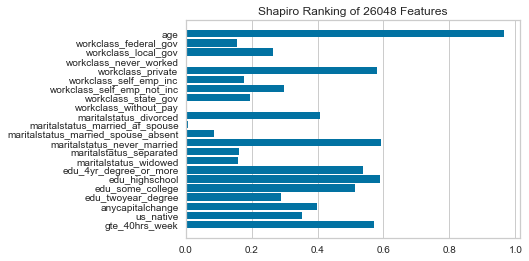

In [24]:
from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=X_train, algorithm='shapiro')

visualizer.fit(X_train, y_train)                # Fit the data to the visualizer
visualizer.transform(X_train)             # Transform the data
visualizer.poof(outpath="pcoords.png")                  # Draw/show/poof the data

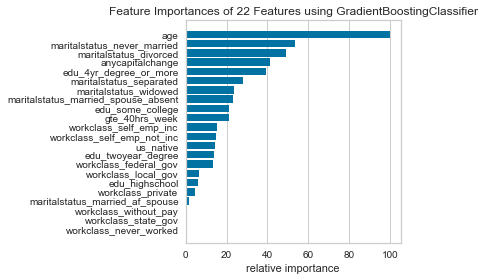

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

from yellowbrick.features.importances import FeatureImportances

# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(GradientBoostingClassifier(), ax=ax)
viz.fit(X_train,y_train)
viz.poof()

### Cutting down the list of features

In [30]:
working_list = ['age', 'maritalstatus_never_married',
       'anycapitalchange', 'us_native', 'gte_40hrs_week']


X = instances[working_list]
y = instances['income_gt_50k']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

### Reviewing the list of of features and their correlation

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


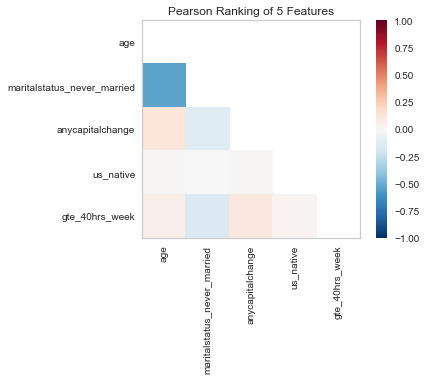

In [31]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X_train)
visualizer.poof()

### This was from Yamil's investigation for our Kiva model. Reusing because of awesomeness.

In [39]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import scale
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, f1_score, log_loss, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.externals import joblib
import pickle

startTime = time.time()


classifiers = [LogisticRegression(),KNeighborsClassifier(3),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100),ExtraTreesClassifier(),
AdaBoostClassifier(),GradientBoostingClassifier(),GaussianNB(),MultinomialNB(),LinearDiscriminantAnalysis(n_components=2),QuadraticDiscriminantAnalysis(),MLPClassifier(alpha=1),LinearSVC(),SGDClassifier()]

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    if hasattr(clf, "predict_proba"):
        train_predictions = clf.predict_proba(X_test)
        ll = log_loss(y_test, train_predictions)
        print("Log Loss: {}".format(ll))
    else:
        print('no predict_proba')
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)

endTime = time.time()
print('Took %s seconds to calculate.' % (endTime - startTime))


LogisticRegression
****Results****
Accuracy: 79.5179%
Log Loss: 0.4311614857819073
KNeighborsClassifier
****Results****
Accuracy: 75.6641%
Log Loss: 3.2542876349386582
DecisionTreeClassifier
****Results****
Accuracy: 79.7482%
Log Loss: 0.5772828234660856
RandomForestClassifier
****Results****
Accuracy: 79.6254%
Log Loss: 0.4843771814779195
ExtraTreesClassifier
****Results****
Accuracy: 79.7482%
Log Loss: 0.552834217291902
AdaBoostClassifier
****Results****
Accuracy: 79.6868%
Log Loss: 0.6672067880015781
GradientBoostingClassifier
****Results****
Accuracy: 80.0706%
Log Loss: 0.4151361212246943
GaussianNB
****Results****
Accuracy: 77.1687%
Log Loss: 0.5863230315292435
MultinomialNB
****Results****
Accuracy: 79.7482%
Log Loss: 0.43665314977090164
LinearDiscriminantAnalysis
****Results****
Accuracy: 79.6868%
Log Loss: 0.4380272607010934
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 76.9998%
Log Loss: 0.5599413105561651
MLPClassifier
****Results****
Accuracy: 79.9785%
Log Loss: 0.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### Logistical Regression seems to be the best fit.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)
expected   = y_test
predicted  = lr.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=['1 week or less','More than 1 week'])
print(classificationReport)

                  precision    recall  f1-score   support

  1 week or less       0.88      0.71      0.79      5026
More than 1 week       0.41      0.68      0.51      1487

     avg / total       0.77      0.70      0.72      6513



### Determine Discrimination Threshold

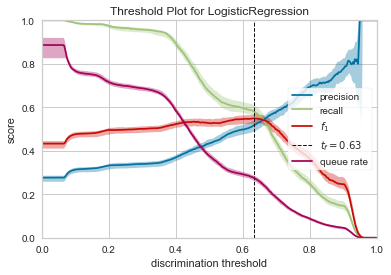

In [33]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import DiscriminationThreshold

# Instantiate the classification model and visualizer
logistic = LogisticRegression(class_weight="balanced")
visualizer = DiscriminationThreshold(logistic)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.poof()     # Draw/show/poof the data